# SNAPred: "state-aware" reduction for powder data measured on SNAP

**IMPORTANT:** Will only work for states that have been calibrated

**STEP 1:** To start, exectute the cell below to set up script (TODO: move this under the hood)

In [13]:
from mantid.simpleapi import *
from mantid import config
config.setLogLevel(0, quiet=True)
#config.setLogLevel(6, quiet=False)
import time
import numpy as np

import bin.FocDACUtilities as DAC
import bin.SNAP_InstPrm as iPrm 
import importlib
importlib.reload(DAC)

<module 'bin.FocDACUtilities' from '/SNS/snfs1/instruments/SNAP/shared/Malcolm/devel/SNAPRed/SNAPRed/bin/FocDACUtilities.py'>

**STEP 2:** Use cell below to check calibration status of state by entering run number(s) below (TODO: add live data option) 

In [15]:
#Enter Run number here:
runNumber='48746'

**STEP 3:** Enter mask file name below (must exist in `IPTS/shared directory`) and adjust other settings

In [16]:
#Enter name of a mask file stored in shared directory of run. If no mask enter empty string.

maskName='snap48746_binMskInfo.json'

##########################################
# More advanced settings
##########################################

settings = dict()
settings['calibState']='before'
settings['GSASOut']=False
settings['ConvertUnits']=False
settings['cleanUp']=True
settings['liteMode']=True

**STEP 4:** Execute cell below to run reduction

In [17]:
##########################################
# Execution
##########################################

time_0 = time.time()
print('\nSNAPReduce 2.0 executing (...sorry this is slow)')
DAC.SNAPRed(runNumber,maskName,settings)
timeInSecs=(time.time()-time_0)
print(f'Complete - time taken was: {timeInSecs:.3f} secs')


SNAPReduce 2.0 executing (...sorry this is slow)
h5py version: 3.3.0
Copying file: /SNS/SNAP/IPTS-24179/nexus/SNAP_48746.nxs.h5
    Time to complete step: 3.6137 sec. Total time to execute: 3.6137
Relabelling pixel IDs
    Time to complete step: 2.5500 sec. Total time to execute: 6.1637
Updating instrument definition
    Time to complete step: 0.7813 sec. Total time to execute: 6.9450
Complete - time taken was: 31.656 secs


In [18]:
#Execute this cell to get info on all workspaces
names = mtd.getObjectNames()
for name in names:
    ws = mtd[name]
    print(name)

CommonRed
DSpac_48746_binMsk_All_VRT
DSpac_48746_binMsk_Column_VRT
DSpac_48746_binMsk_Group_VRT
lite
SNAP48746_Red
SNAPAllGp
SNAPColumnGp
SNAPGroupGp
TOF_48746_monitors
TOF_rawVmB


## Create a filtered list of reduced workspaces and prepare for plotting

Has possiblity to filter according to string, this will control what is available for plotting below

In [19]:
print('List of mantid workspaces generated:')
names = mtd.getObjectNames()

filter = 'DSpac' #a single string that must exist in workspace name

useRunLst = []
useMskLst = []
for workspace in names :
    if filter in workspace :
        ws = mtd[workspace]
        nHst = ws.getNumberHistograms()
        wsStr=workspace.split('_')
        if wsStr[1].isnumeric: #this is a data workspace
            useRunLst.append(wsStr[1])
            useMskLst.append(wsStr[2])
            print(f'workspace: {workspace} contains {nHst} histograms')
useRunLst = [*set(useRunLst)] #remove duplicates
useMskLst = [*set(useMskLst)]
useRunLst = sorted([int(x) for x in useRunLst])

print(f'Generated useRunLst: {useRunLst}')
print(f'masktag: {useMskLst}')
# a=sorted(useRunLst)
# print(a)

List of mantid workspaces generated:
workspace: DSpac_48746_binMsk_All_VRT contains 1 histograms
workspace: DSpac_48746_binMsk_Column_VRT contains 6 histograms
workspace: DSpac_48746_binMsk_Group_VRT contains 2 histograms
Generated useRunLst: [48746]
masktag: ['binMsk']


## Display all runs in useRunLst for a chosen pixel group

Specify name of group at start of script. For cases where a group contains multiple histograms, can also specify histogram of choice.

In [20]:
import matplotlib.pyplot as plt

%matplotlib widget
runLst = useRunLst

focGp='Group'
histogram=1
off=0.05 #will offset successive runs by this amount vertically


figTitle = f'all runs in useRunLst for group {focGp}'
fig, ax = plt.subplots()
for i,run in enumerate(runLst):


    wsName = f'DSpac_{run}_{mskTag}_{focGp}_VRT'
    ws = mtd[wsName]

    x = ws.readX(histogram)
    y = ws.readY(histogram)+i*off
    ax.plot(x[0:-1],y,label=f'{run}') #This is a hack because CTPD is crashing for unknown reason.

    
ax.set_title(figTitle)
#plt.xlim(0.9,2.1)
#plt.ylim(-0.3,3)
plt.legend()
plt.xlabel('d-spacing, d (Ang)')
plt.ylabel('Arb. Intensity')

ModuleNotFoundError: No module named 'matplotlib'

In [20]:
print(sPrm['focGroupLst'])
for gpNo, focGrp in enumerate(sPrm['focGroupLst']):
    print(sPrm['focGroupDMin'][gpNo])

NameError: name 'sPrm' is not defined

## Or display all groups for a chosen run

Available runs are contained in `useRunLst`. During reduction, one of two masks type can be applied or no masks at all. The nature of the mask applied is stored in the name of the workspace. 

Correspondingly, it is necessary to specify 

In [9]:
useRunLst

[48746]

Text(0, 0.5, 'Arb. Intensity')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
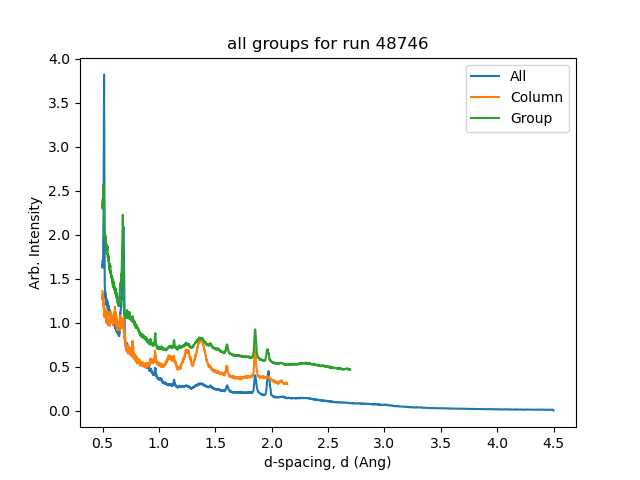

In [11]:
import matplotlib.pyplot as plt

%matplotlib widget

focGpLst=['All','Column','Group']
runIndx = 0
mskTag = 'binMsk'

runLst = useRunLst
off = 0.2 #set to offset successive groups
figTitle = f'all groups for run {runLst[runIndx]}'
fig, ax = plt.subplots()
for i,focGp in enumerate(focGpLst):
    wsName = f'DSpac_{runLst[runIndx]}_{mskTag}_{focGp}_VRT'
    ws = mtd[wsName]
    kk=0
    x = ws.readX(kk)
    y = ws.readY(kk)+i*off
    ax.plot(x[0:-1],y,label=f'{focGp}') #This is a hack because CTPD is crashing for unknown reason.

    
ax.set_title(figTitle)
#plt.xlim(0.9,2.1)
#plt.ylim(-0.3,3)
plt.legend()
plt.xlabel('d-spacing, d (Ang)')
plt.ylabel('Arb. Intensity')

## Attempt to subtract background before saving GSAS files

My first attempt is to copy Clemens Prescher's background subtraction script. Looks like it will work with a simple copy/paste

Text(0, 0.5, 'Arb. Intensity')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
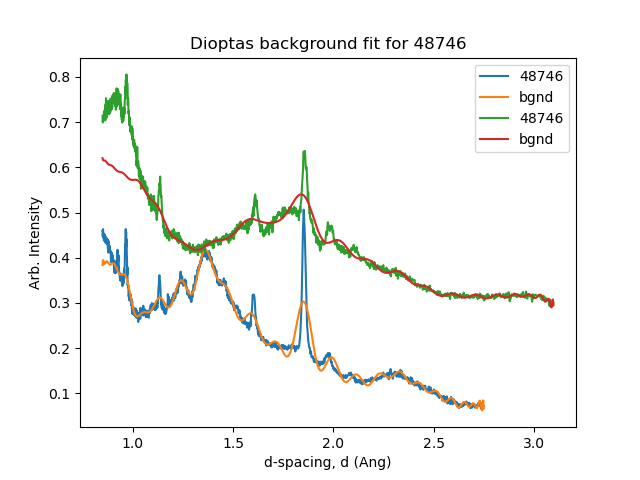

In [17]:
# import numpy as np

def smooth_bruckner(y, smooth_points, iterations):
    y_original = y
    N_data = y.size
    N = smooth_points
    N_float = float(N)
    y = np.empty(N_data + N + N)

    y[0:N].fill(y_original[0])
    y[N:N + N_data] = y_original[0:N_data]
    y[N + N_data:N_data + N + N].fill(y_original[-1])

    y_avg = np.average(y)
    y_min = np.min(y)

    y_c = y_avg + 2. * (y_avg - y_min)
    y[y > y_c] = y_c

    window_size = N_float*2+1


    for j in range(0, iterations):
        window_avg = np.average(y[0: 2*N + 1])
        for i in range(N, N_data - 1 - N - 1):
            if y[i]>window_avg:
                y_new = window_avg
                #updating central value in average (first bracket)
                #and shifting average by one index (second bracket)
                window_avg += ((window_avg-y[i]) + (y[i+N+1]-y[i - N]))/window_size
                y[i] = y_new
            else:
                #shifting average by one index
                window_avg += (y[i+N+1]-y[i - N])/window_size
    return y[N:N + N_data]

def extract_background(x, y, smooth_width=0.1, iterations=50, cheb_order=50):
    """
    Performs a background subtraction using bruckner smoothing and a chebyshev polynomial.
    Standard parameters are found to be optimal for synchrotron XRD.
    :param x: x-data of pattern
    :param y: y-data of pattern
    :param smooth_width: width of the window in x-units used for bruckner smoothing
    :param iterations: number of iterations for the bruckner smoothing
    :param cheb_order: order of the fitted chebyshev polynomial
    :return: vector of extracted y background
    """
    smooth_points = int((float(smooth_width) / (x[1] - x[0])))

    y_smooth = smooth_bruckner(y, abs(smooth_points), iterations)
    # get cheb input parameters
    x_cheb = 2. * (x - x[0]) / (x[-1] - x[0]) - 1.
    cheb_parameters = np.polynomial.chebyshev.chebfit(x_cheb,
                                                      y_smooth,
                                                      cheb_order)

    return np.polynomial.chebyshev.chebval(x_cheb, cheb_parameters)

#get data
plt.close(fig)
focGpLst=['Gp01','Gp02']
useRunIndx = 0
off = 0.2

#plot results
figTitle = f'Dioptas background fit for {useRunLst[useRunIndx]}'
fig, ax = plt.subplots()
for i,focGp in enumerate(focGpLst):
    wsName = f'DSpac_{useRunLst[useRunIndx]}_{mskTag}_{focGp}_VRT'
    ws = mtd[wsName]
    x = ws.readX(0)
    y = ws.readY(0)

    #fit background
    b = extract_background(x[0:-1],y,smooth_width=0.4,iterations=50,cheb_order=48)

    # print(len(b),len(x))

    ax.plot(x[0:-1],y+i*off,label=f'{useRunLst[useRunIndx]}') #This is a hack because CTPD is crashing for unknown reason.
    ax.plot(x[0:-1],b+i*off,label='bgnd')
ax.set_title(figTitle)
#plt.xlim(0.9,2.1)
#plt.ylim(-0.3,3)
plt.legend()
plt.xlabel('d-spacing, d (Ang)')
plt.ylabel('Arb. Intensity')


## Try using ClipPeaks to fit background...

### First attempt

Initial pass looks promising, but it is being pulled off by the large sample peaks. 

### Second attempt: 

Introduced some pre-processing to remove peaks first and then running `ClipPeaks`. This looks promising, but `FindPeaks` isn't fully reliable. It can miss some peaks that seem to have quite different FWHM from majority of peaks.

### Third attempt

Allow two passes of pre-processing where output of first pass is input to second pass and where second pass uses a different FWHM.

This didn't seem to help

### Where to now?

`FindPeaks` is just not doing what I need.It works some of the time, but there seem to always be one or two peaks that get missed for non-obvious reasons. It is also highly sensistive to FWHM input, which is specified in No. of bins. changing FWHM by +/- 1 is enough to dramatically change the found peaks behaviour.

So, now I'm wondering if there is an alternative way to find and remove peaks?

deleted existing foundPks ws
Empty DataFrame
Columns: [spectrum, centre, width, height, backgroundintercept, backgroundslope, A2, chi2]
Index: []


Text(0, 0.5, 'Arb. Intensity')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
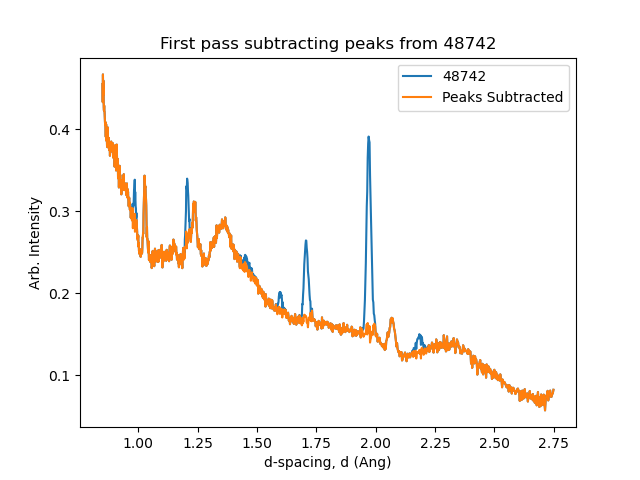

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
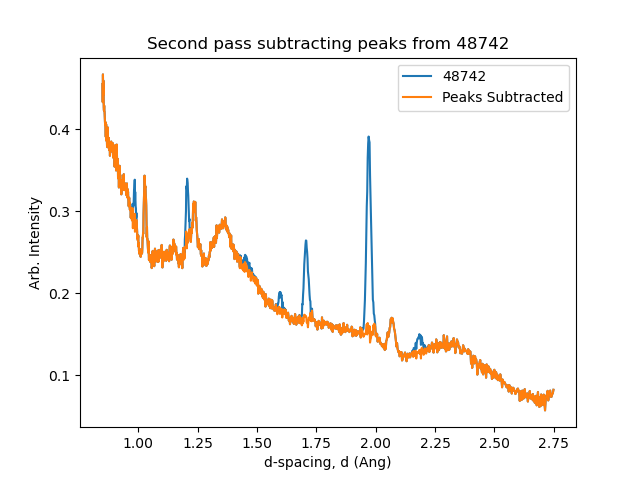

In [31]:
#select a run to work on 
import numpy as np

config.setLogLevel(0, quiet=True)

runIndx=1
focGpIndx=0

fwhm1 = 10
fwhm2 = 5

#pre-process data

#check no foundPks workspace already exists. If so, delete it

try:
    DeleteWorkspace(Workspace=foundPks)
    print('deleted existing foundPks ws')
except:
    pass

#get input data

ws = mtd[f'DSpac_{useRunLst[runIndx]}_{mskTag}_{focGpLst[focGpIndx]}_VRT']
x = ws.readX(0)
y = ws.readY(0)

#
# First pass
#

foundPks=FindPeaks(InputWorkspace=f'DSpac_{useRunLst[runIndx]}_{mskTag}_{focGpLst[focGpIndx]}_VRT',
        FWHM=fwhm1,
        PeakFunction='Gaussian',
        BackgroundType='Quadratic',
        PeaksList='pkList',
        HighBackground=True)
df = pd.DataFrame(foundPks.toDict())
#print(df)

pksy = np.zeros(len(y)) #array to put found peak intensities
nPks = foundPks.rowCount()
for i in range(nPks):
    h = foundPks.row(i)['height']
    c = foundPks.row(i)['centre']
    FWHM = foundPks.row(i)['width']
    sig = FWHM/(2*np.sqrt(2*np.log(2)))
    
    #messy part below handles weird behaviour of FindPeaks that puts
    #two identical peaks on top of one another...
    
    if i != 0:
        gapToPrev = np.abs(c-foundPks.row(i-1)['centre'])
        if gapToPrev>FWHM:
            for j in range(len(x)-1):
                xval = (x[j]+x[j+1])/2 #mid point of bin
                pksy[j]=pksy[j]+h*np.exp(-0.5*((xval-c)/sig)**2)
        else:
            pass
    if i == 0:
        for j in range(len(x)-1):
                xval = (x[j]+x[j+1])/2 #mid point of bin
                pksy[j]=pksy[j]+h*np.exp(-0.5*((xval-c)/sig)**2)
        
#subtract fitted peaks from y data
yMinusPks1 = y-pksy

#plot results
figTitle = f'First pass subtracting peaks from {useRunLst[runIndx]}'
fig, ax = plt.subplots()
ax.plot(x[0:-1],y,label=f'{useRunLst[runIndx]}') #This is a hack because CTPD is crashing for unknown reason.
ax.plot(x[0:-1],yMinusPks1,label='Peaks Subtracted')
ax.set_title(figTitle)
#plt.xlim(0.9,2.1)
#plt.ylim(-0.3,3)
plt.legend()
plt.xlabel('d-spacing, d (Ang)')
plt.ylabel('Arb. Intensity')

#
#Second pass
#

#need to put output of first pass into a mantid workspace to use FindPeaks
CreateWorkspace(OutputWorkspace='FirstPkRem',
                DataX=x,
                DataY=yMinusPks)


foundPks=FindPeaks(InputWorkspace='FirstPkRem',
        FWHM=fwhm2,
        PeakFunction='Gaussian',
        BackgroundType='Quadratic',
        PeaksList='pkList',
        HighBackground=True)
df = pd.DataFrame(foundPks.toDict())
print(df)

pksy = np.zeros(len(yMinusPks)) #array to put found peak intensities
nPks = foundPks.rowCount()
for i in range(nPks):
    h = foundPks.row(i)['height']
    c = foundPks.row(i)['centre']
    FWHM = foundPks.row(i)['width']
    sig = FWHM/(2*np.sqrt(2*np.log(2)))
    
    #messy part below handles weird behaviour of FindPeaks that puts
    #two identical peaks on top of one another...
    
    if i != 0:
        gapToPrev = np.abs(c-foundPks.row(i-1)['centre'])
        if gapToPrev>FWHM:
            for j in range(len(x)-1):
                xval = (x[j]+x[j+1])/2 #mid point of bin
                pksy[j]=pksy[j]+h*np.exp(-0.5*((xval-c)/sig)**2)
        else:
            pass
    if i == 0:
        for j in range(len(x)-1):
                xval = (x[j]+x[j+1])/2 #mid point of bin
                pksy[j]=pksy[j]+h*np.exp(-0.5*((xval-c)/sig)**2)
        
#subtract fitted peaks from y data
yMinusPks2 = yMinusPks1-pksy

#plot results
figTitle = f'Second pass subtracting peaks from {useRunLst[runIndx]}'
fig, ax = plt.subplots()
ax.plot(x[0:-1],y,label=f'{useRunLst[runIndx]}') #This is a hack because CTPD is crashing for unknown reason.
ax.plot(x[0:-1],yMinusPks2,label='Peaks Subtracted')
ax.set_title(figTitle)
#plt.xlim(0.9,2.1)
#plt.ylim(-0.3,3)
plt.legend()
plt.xlabel('d-spacing, d (Ang)')
plt.ylabel('Arb. Intensity')

## Exploring some scipy algorithms to find peaks...

Found 10 peaks found at: [0.92454415 0.96514593 1.13365122 1.17518503 1.23911711 1.35846197
 1.60202861 1.85187429 1.98013451 2.28437697]
dict_keys(['peak_heights', 'prominences', 'left_bases', 'right_bases', 'widths', 'width_heights', 'left_ips', 'right_ips'])
peak 0 position: 0.925 width 10.040
peak 1 position: 0.965 width 11.006
peak 2 position: 1.134 width 11.049
peak 3 position: 1.175 width 6.725
peak 4 position: 1.239 width 32.648
peak 5 position: 1.358 width 87.792
peak 6 position: 1.602 width 11.249
peak 7 position: 1.852 width 10.391
peak 8 position: 1.980 width 15.326
peak 9 position: 2.284 width 8.132


Text(0, 0.5, 'Arb. Intensity')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
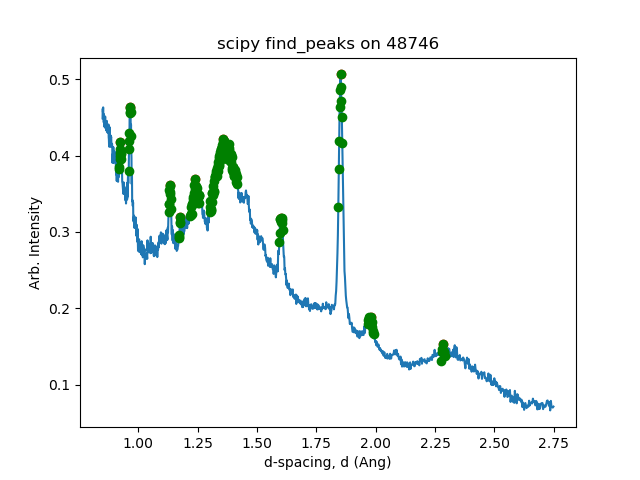

In [35]:
from scipy.signal import find_peaks
#get input data

focGpIndx=0

ws = mtd[f'DSpac_{useRunLst[useRunIndx]}_{mskTag}_{focGpLst[focGpIndx]}_VRT']
x = ws.readX(0)
y = ws.readY(0)
yin = np.array(y)

a,props = find_peaks(yin, 
                 height=0,
                 width=5,
                 prominence=0.02)
print(f'Found {len(a)} peaks found at: {x[a]}')

print(props.keys())
# for i in range(len(a)):
#     width=props["widths"][i]
#     print(f'peak {i} width {width}')

figTitle = f'scipy find_peaks on {useRunLst[runIndx]}'
fig, ax = plt.subplots()
ax.plot(x[0:-1],y,label=f'{useRunLst[runIndx]}')

#
# Run through list of peaks and print/plot useful things
#
for i in range(len(a)):
    width=props["widths"][i]
    pkIndx = a[i]
    print(f'peak {i} position: {x[pkIndx]:.3f} width {width:.3f}')
    #print(f'width divided by 2: {int(width/2)}')
    #print(f'min indx = {pkIndx-int(width/2)} max indx= {a[i]+int(width/2)}')
    ax.plot(x[a[i]],y[a[i]],label='scipy.find_peaks positions',
            marker='o',
            color='red',
            linestyle='none')
    pkRng=range(pkIndx-int(width/2),pkIndx+int(width/2))
    ax.plot(x[pkRng],y[pkRng],
           marker='o',
           color='green',
           linestyle='none')
        
ax.set_title(figTitle)
#plt.legend()
plt.xlabel('d-spacing, d (Ang)')
plt.ylabel('Arb. Intensity')




In [28]:
plt.close(fig)

Text(0, 0.5, 'Arb. Intensity')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
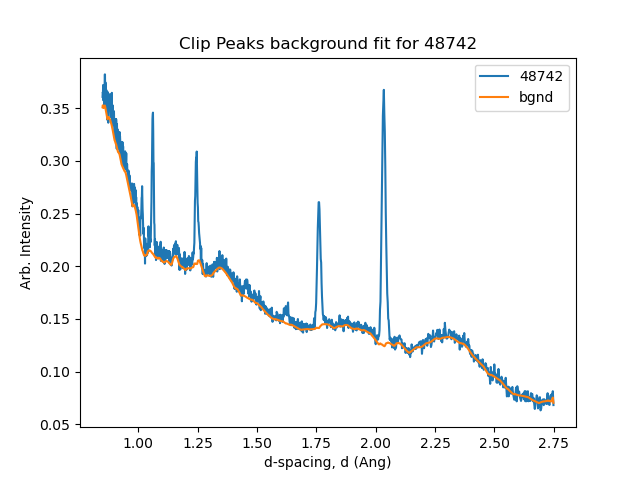

In [30]:
def smooth(data, order):
    # This smooths data based on linear weigthed average around
    # point i for example for an order of 7 the i point is
    # weighted 4, i=/- 1 weighted 3, i+/-2 weighted 2 and i+/-3
    # weighted 1 this input is only the y values
    sm = np.zeros(len(data))
    factor = order / 2 + 1

    for i in range(len(data)):
        temp = 0
        ave = 0
        for r in range(max(0, i - int(order / 2)),
                       min(i + int(order / 2), len(data) - 1) + 1):
            temp = temp + (factor - abs(r - i)) * data[r]
            ave = ave + factor - abs(r - i)
        sm[i] = temp / ave

    return sm

def LLS_transformation(input):
    # this transforms data to be more sensitive to weak peaks. The
    # function is reversed by the Inv_LLS function below
    out = np.log(np.log((input + 1)**0.5 + 1) + 1)

    return out

def Inv_LLS_transformation(input):
    # See Function LLS function above
    out = (np.exp(np.exp(input) - 1) - 1)**2 - 1

    return out


def peak_clip(data, win=30, decrease=True, LLS=True, smooth_window=0):
    start_data = np.copy(data)

    window = win

    if smooth_window > 0:
        data = smooth(data, smooth_window)

    if LLS:
        data = LLS_transformation(data)

    temp = data.copy()

    if decrease:
        scan = list(range(window + 1, 0, -1))
    else:
        scan = list(range(1, window + 1))

    for w in scan:
        for i in range(len(temp)):
            if i < w or i > (len(temp) - w - 1):
                continue
            else:
                win_array = temp[i - w:i + w + 1].copy()
                win_array_reversed = win_array[::-1]
                average = (win_array + win_array_reversed) / 2
                temp[i] = np.min(average[:int(len(average) / 2)])

    if LLS:
        temp = Inv_LLS_transformation(temp)


    index = np.where((start_data - temp) == min(start_data - temp))[0][0]
    output = temp * (start_data[index] / temp[index])

    return output


#clip peaks
b = peak_clip(yMinusPks2,win=4, decrease=False, LLS=False, smooth_window=0)+0.005

#plot results
figTitle = f'Clip Peaks background fit for {useRunLst[1]}'
fig, ax = plt.subplots()
ax.plot(x[0:-1],y,label=f'{useRunLst[1]}') #This is a hack because CTPD is crashing for unknown reason.
ax.plot(x[0:-1],b,label='bgnd')
ax.set_title(figTitle)
#plt.xlim(0.9,2.1)
#plt.ylim(-0.3,3)
plt.legend()
plt.xlabel('d-spacing, d (Ang)')
plt.ylabel('Arb. Intensity')

Text(0, 0.5, 'Arb. Intensity')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
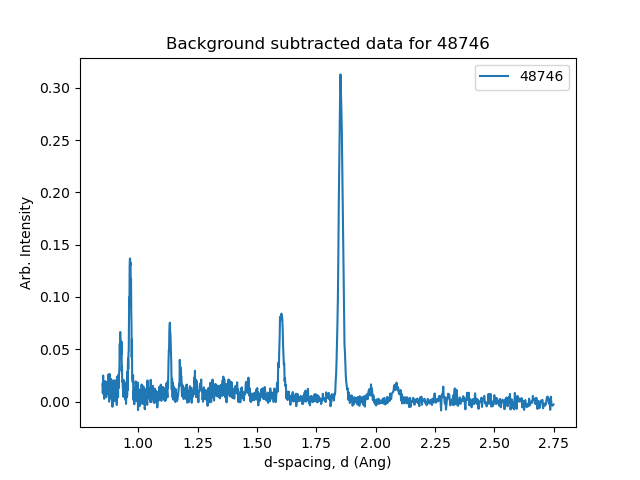

In [348]:
ymb = y-b

#plot results
figTitle = f'Background subtracted data for {useRunLst[1]}'
fig, ax = plt.subplots()
ax.plot(x[0:-1],ymb,label=f'{useRunLst[1]}') #This is a hack because CTPD is crashing for unknown reason.
ax.set_title(figTitle)
#plt.xlim(0.9,2.1)
#plt.ylim(-0.3,3)
plt.legend()
plt.xlabel('d-spacing, d (Ang)')
plt.ylabel('Arb. Intensity')

## Generate GSAS files for all runs in useRunLst for a chosen group

In [200]:
import json

focGpLst=['Gp01','Gp02']
dispGp = 1

runLst = useRunLst

focGp=focGpLst[dispGp]

for i,run in enumerate(runLst):

    wsName = f'DSpac_{run}_{mskTag}_{focGp}_VRT'

    #get instrument, state parameters and run parameters and store in single dictionary
    allPrm = {}
    for key,value in iPrm.__dict__.items():
        if key[0:2] != '__':
            allPrm[key]=value

    sPrm,error=DAC.getStatePrm(int(run),'before')
    allPrm.update(sPrm)

    rPrm = DAC.initPrm(int(run),case='before')
    rPrm['maskFileName']=maskName.value #TODO: allow for different masks for different runs
    allPrm.update(rPrm)

    ConvertUnits(InputWorkspace=wsName,
                 OutputWorkspace='gsasOut',
                 Target='TOF')

    SaveGSS(InputWorkspace='gsasOut',
            Filename=allPrm['gsasFileLoc']+f'gsas2/{focGp}/snap{run}_{focGp}.gss',
            Bank=1,
            Format='SLOG',
            Append=False, 
            MultiplyByBinWidth=True,
            UserSpecifiedGSASHeader=f'run: {run}')

    print(f'wrote: {allPrm["gsasFileLoc"]}gsas2/{focGp}/snap{run}_{focGp}.gss')
    print(f'wrote: {allPrm["gsasFileLoc"]}gsas2/{focGp}/snap{run}_{focGp}.json')

    redPrmFile = allPrm['gsasFileLoc']+f'gsas2/{focGp}/snap{run}_{focGp}.json'    
    with open(redPrmFile, "w") as outfile:
        json.dump(allPrm, outfile)

        
DeleteWorkspace(Workspace='gsasOut')
print(f'Completed writing gsas files for group: {focGp}')

wrote: /SNS/SNAP/IPTS-24179/shared/test/reduced/gsas2/Gp02/snap48705_Gp02.gss
wrote: /SNS/SNAP/IPTS-24179/shared/test/reduced/gsas2/Gp02/snap48705_Gp02.json
Completed writing gsas files for group: Gp02


Row
    [0] Column
        [0] RadioButtonGroup(name='Available Focused G..., options=['All', 'Bank', ...], value='Columns')
        [1] CheckButtonGroup(name='Available Groups', options=['Col 1', 'Col 2', ...], orientation='vertical', value=['Col 3', 'Col 4'])
    [1] ParamFunction(function)
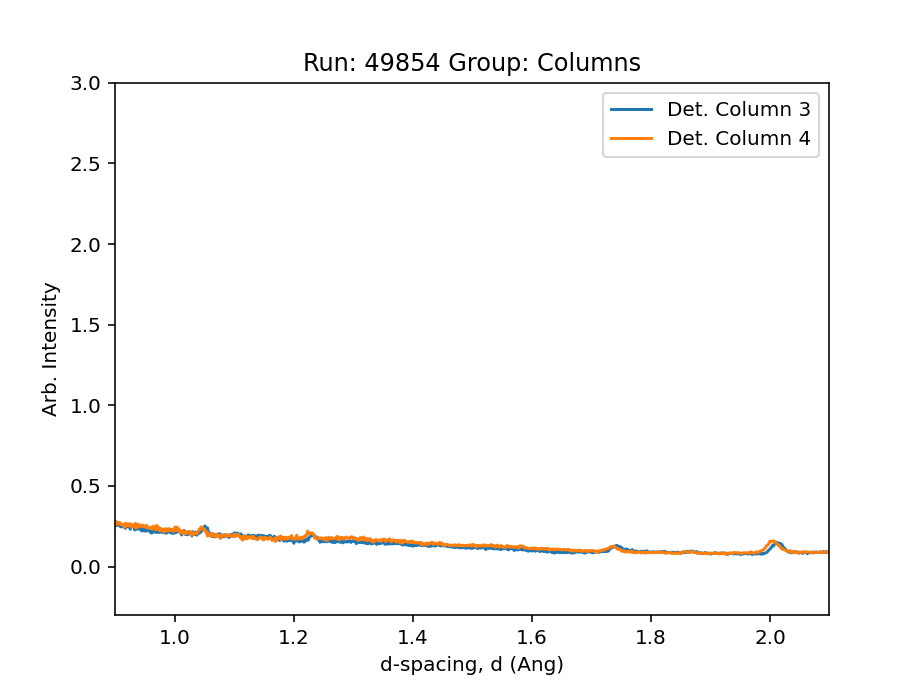

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
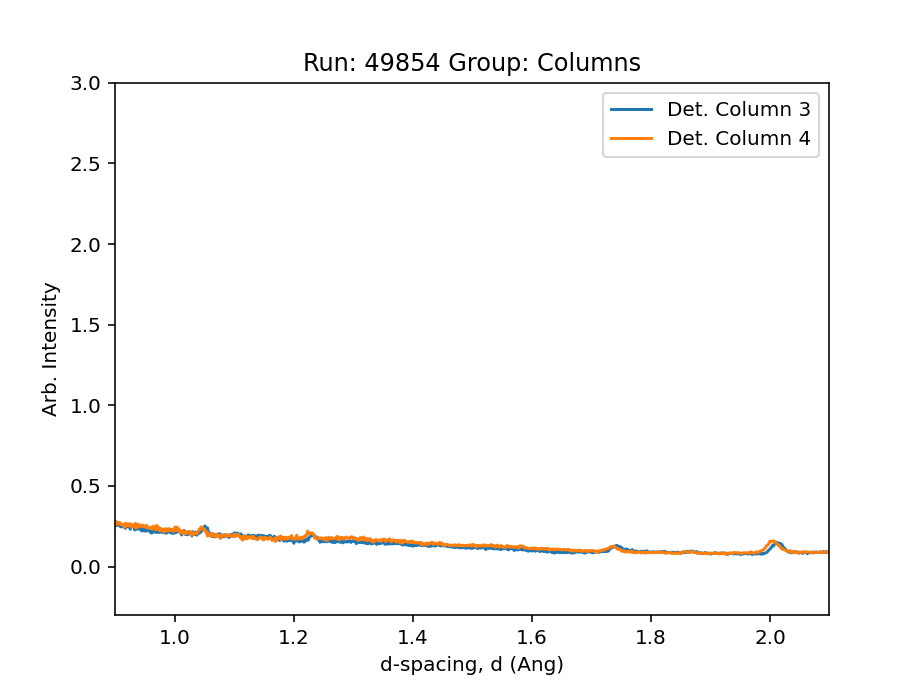

In [187]:
import matplotlib.pyplot as plt

%matplotlib widget

def showData(run2plot,focGroupLst,UseSpec_CBG):

    #UseSpec_RBG is a list of names like 'Col 3' etc. need to extract the number
    #there must be a more pythonic way :( 
    b = []
    for x in UseSpec_CBG:
        for y in x.split():
            if y.isdigit():
                b.append(int(y)-1)
    #print('Trying to plot these spectra: ',b)

    wsName = f'DSpac_{run2plot}_binMsk_Column_VRT'
    figTitle = f'Run: {run2plot} Group: {focGroupLst}'
    #ConvertToPointData(InputWorkspace=wsName,OutputWorkspace='pts')
    ws = mtd[wsName]
    #
    # Plotting code
    #
    fig, ax = plt.subplots()
    for kk in b:
        x = ws.readX(kk)
        y = ws.readY(kk)
        ax.plot(x[0:-1],y,label=f'Det. Column {kk+1}') #This is a hack because CTPD is crashing for unknown reason.
    ax.set_title(figTitle)
    plt.xlim(0.9,2.1)
    plt.ylim(-0.3,3)
    plt.legend()
    plt.xlabel('d-spacing, d (Ang)')
    plt.ylabel('Arb. Intensity')
    return fig


#create checkbuttongroup for pixel groups

# UseSpec_CBG = pn.widgets.CheckButtonGroup(name='Available Groups',
#                                           value=["A"],
#                                           options=["A","B"]

focGroupLst_RBG = pn.widgets.RadioButtonGroup(name='Available Focused Groups',
                                              value='Columns',
                                              options=['All','Bank','Columns'])

#separately define group names for groups. This will be used to allow selection between them, and for legend



UseSpec_CBG = pn.widgets.CheckButtonGroup(name='Available Groups',
                                              value=['Col 3','Col 4'],
                                              options=['Col 1',
                                                       'Col 2',
                                                       'Col 3',
                                                       'Col 4',
                                                       'Col 5',
                                                       'Col 6'],
                                          orientation='vertical')
run2plot=useRunLst[0] 


dispFnCall = pn.bind(showData,run2plot,focGroupLst_RBG,UseSpec_CBG)
# fig, ax = plt.subplots()
# disp = pn.pane.Matplotlib(fig)

col = pn.Column(focGroupLst_RBG,UseSpec_CBG)
plotPanel = pn.Row(col,dispFnCall)
plotPanel

## Delete workspaces 

Use this to clear house. At the moment not sure how to keep track of memory usage in a jupyter notebook, but it certainly will build up same as workbench

In [5]:
names = mtd.getObjectNames()
for workspace in names :
        DeleteWorkspace(workspace)

DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Information] Algorithm: DeleteWorkspace v1
DeleteWorkspace-[Information] Execution Date: 2022-09-08 17:46:13.887722000
DeleteWorkspace-[Information] Execution Duration: -1 seconds
DeleteWorkspace-[Information] UUID: 0282629f-2620-43a7-a01e-801735ab279f
DeleteWorkspace-[Information] Parameters:
DeleteWorkspace-[Information]   Name: Workspace, Value: CommonRed, Default?: No, Direction: Input
DeleteWorkspace-[Notice] DeleteWorkspace started (child)
DeleteWorkspace-[Information] Algorithm: DeleteWorkspace v1
DeleteWorkspace-[Information] Execution Date: 2022-09-08 17:46:13.887936000
DeleteWorkspace-[Information] Execution Duration: -1 seconds
DeleteWorkspace-[Information] UUID: 71137b99-2000-4081-ab79-be3a5ee712a9
DeleteWorkspace-[Information] Parameters:
DeleteWorkspace-[Information]   Name: Workspace, Value: TOF_rawVmB, Default?: No, Direction: Input
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 second

ValueError: Problem setting "Workspace" in DeleteWorkspace-v1: Invalid value for property Workspace (Workspace) from string "SNAPAllGp": Workspace "SNAPAllGp" was not found in the Analysis Data Service